# ECON 31703 Problem Set 3 - Arjun Gopinath and Tugce Turk
## Question 2 (Trees)

In [1]:
# Standard Python Imports

import numpy as np
import pandas as pd
from numba import njit, jit
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
import statsmodels.api as sm
from scipy.stats import norm, zscore
import scipy as sp
from numpy import random, linalg
from scipy import sparse, stats
import itertools as it
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.linear_model import Lasso
import cProfile
import warnings

warnings.filterwarnings("ignore")

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amssymb}',
    r'\usepackage{amsmath}',
    r'\usepackage{xcolor}',
    r'\renewcommand*\familydefault{\sfdefault}']
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
matplotlib.rcParams['pgf.preamble']  = [
    r'\usepackage[utf8x]{inputenc}',
    r'\usepackage{amssymb}',
    r'\usepackage[T1]{fontenc}',
    r'\usepackage{amsmath}',
    r'\usepackage{sansmath}']

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

inv, ax, norm = np.linalg.inv, np.newaxis, np.linalg.norm
randint = np.random.randint

from TreeHelperAGTT import Tree

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(100)
N_obs = 100

In [3]:
data = dict()
data['X'] = np.random.normal(size=N_obs)
data['Y'] = data['X'] ** 2 + np.random.normal(size=N_obs)

In [4]:
data = pd.DataFrame(data)

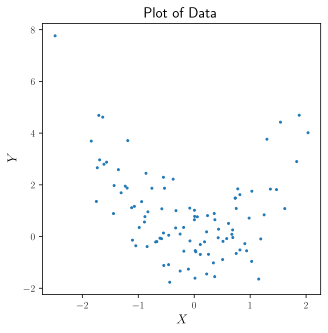

In [5]:
fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=600)

ax1.scatter(data['X'], data['Y'], s=4);
ax1.set_xlabel(r'$X$', fontsize=13);
ax1.set_ylabel(r'$Y$', fontsize=13);
ax1.set_title('Plot of Data', fontsize=15);

In [6]:
tree_ex = Tree()
tree_ex.createTerminalNode(data=data, index=data.index)
tree_ex.growTree(data=data)
tree_ex.left.growTree(data=data)
tree_ex.right.growTree(data=data)
tree_ex.left.left.growTree(data=data)
tree_ex.left.right.growTree(data=data)
tree_ex.right.left.growTree(data=data)
tree_ex.right.right.growTree(data=data)

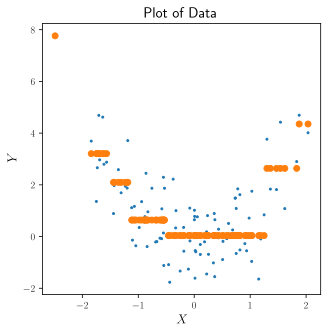

In [8]:
fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=600)

ax2.scatter(data['X'], data['Y'], s=4);
ax2.scatter(data['X'], np.vectorize(tree_ex.predictTree)(data.index))
ax2.set_xlabel(r'$X$', fontsize=13);
ax2.set_ylabel(r'$Y$', fontsize=13);
ax2.set_title('Plot of Data', fontsize=15);